# CONTENTS
1. IMPORTING LIBRARIES/DATA
2. DATA OVERVIEW
3. DATA PREPROCESSING

    3a. WRANGLING
    
    3b. FEATURE SCALING
    
4. THE ELBOW TECHNIQUE
5. K-MEANS CLUSTERING
6. CLUSTER DESCRIPTIVE ANALYSIS

# IMPORTING LIBRARIES/DATA

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pylab as pl # pylab is a convenience module that bulk imports matplotlib

In [2]:
# initilize path variable
path = r'/Users/smac_/Documents/Courses/CF Data Analytics Program/Data Immersion/Achievement 6/07-2023 NYC Airbnb Market Analysis'

In [3]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Processed Data', 'listings_clean.pkl'))

In [4]:
# display charts in notebook without "calling" them
%matplotlib inline

# DATA OVERVIEW

In [5]:
# first 5 rows
df.head()

,id,host_id,nbhd_group,nbhd,latitude,longitude,room_type,price,min_nights,reviews_count,last_review,monthly_reviews,host_list_count,availability_365,reviews_count_ltm
0,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0
1,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1
2,14991,59023,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3
3,5136,7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1
4,59709,186084,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23


In [6]:
# last 5 rows
df.tail()

,id,host_id,nbhd_group,nbhd,latitude,longitude,room_type,price,min_nights,reviews_count,last_review,monthly_reviews,host_list_count,availability_365,reviews_count_ltm
43561,905031073149861760,86368678,Brooklyn,Canarsie,40.633458,-73.899472,Entire home/apt,208,3,0,Unavailable,0.0,3,358,0
43562,905038362467988591,52064945,Brooklyn,Park Slope,40.677256,-73.981435,Private room,530,30,0,Unavailable,0.0,1,270,0
43563,905066559607295258,22541573,Manhattan,East Village,40.732530,-73.989880,Entire home/apt,382,30,0,Unavailable,0.0,132,288,0
43564,905077900484113845,151692758,Brooklyn,Canarsie,40.638210,-73.915920,Entire home/apt,199,2,0,Unavailable,0.0,1,155,0
43565,905109354552786380,25138314,Manhattan,Midtown,40.765086,-73.976717,Private room,662,1,0,Unavailable,0.0,116,250,0


In [7]:
# column names & data types
df.dtypes

id                     int64
host_id                int64
nbhd_group            object
nbhd                  object
latitude             float64
longitude            float64
room_type             object
price                  int64
min_nights             int64
reviews_count          int64
last_review           object
monthly_reviews      float64
host_list_count        int64
availability_365       int64
reviews_count_ltm      int64
dtype: object

In [8]:
# dataframe size
df.shape

(43555, 15)

# DATA PREPROCESSING

## WRANGLING

In [9]:
# initialize DataFrame with numeric variables only
num_cols = ['price',
            'min_nights',
            'reviews_count',
            'monthly_reviews',
            'host_list_count',
            'availability_365',
            'reviews_count_ltm']

subset_df = df[num_cols].copy()

## FEATURE SCALING
### NORMALIZATION

In [10]:
# calculate summary statistics in subset DataFrame
summ_stats = subset_df.describe()
summ_stats

,price,min_nights,reviews_count,monthly_reviews,host_list_count,availability_365,reviews_count_ltm
count,43555.000000,43555.000000,43555.000000,43555.000000,43555.000000,43555.000000,43555.000000
mean,218.863850,18.579474,26.373367,0.926091,30.941958,137.002411,7.883940
std,442.462035,25.378979,57.746498,1.633940,99.120115,137.343087,18.252904
min,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,80.000000,2.000000,1.000000,0.010000,1.000000,0.000000,0.000000
50%,136.000000,15.000000,5.000000,0.230000,1.000000,89.000000,1.000000
75%,229.000000,30.000000,24.000000,1.270000,5.000000,278.000000,8.000000
max,20500.000000,500.000000,2024.000000,63.950000,569.000000,365.000000,1128.000000


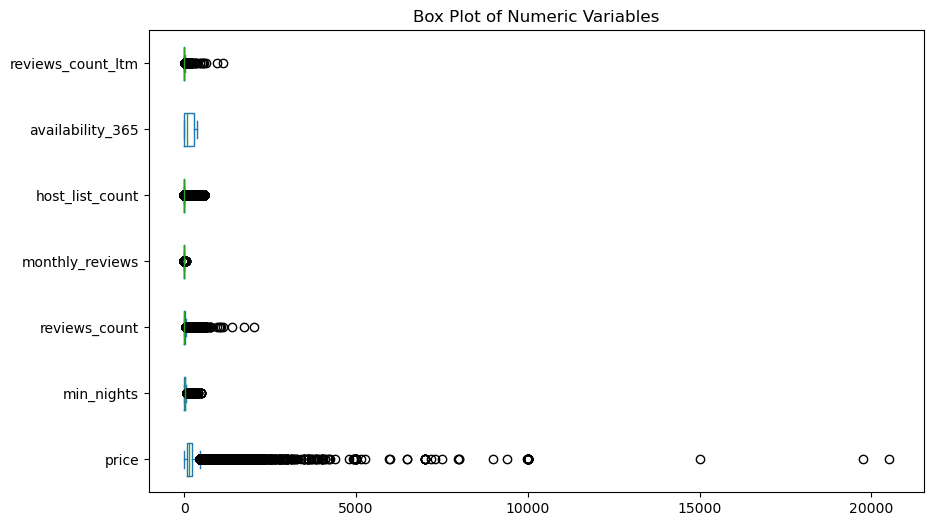

In [11]:
# generate box plots for all columns in subset DataFrame
subset_df.plot(kind='box', vert=False, figsize=(10, 6))
plt.title('Box Plot of Numeric Variables')
plt.show()

In [12]:
# initialize scaler object
scaler = MinMaxScaler()

In [13]:
# fit Dataframe into scaler to transform variables
normalized_sub_df = scaler.fit_transform(subset_df)

# convert output back to Dataframe
normalized_columns = subset_df.columns
normalized_sub_df = pd.DataFrame(normalized_sub_df, columns=normalized_columns)

In [14]:
# first 5 rows of normalized DataFrame
normalized_sub_df.head()

,price,min_nights,reviews_count,monthly_reviews,host_list_count,availability_365,reviews_count_ltm
0,0.002440,0.058116,0.024704,0.004535,0.001761,0.000000,0.000000
1,0.011225,0.058116,0.024209,0.004691,0.003521,0.890411,0.000887
2,0.005368,0.008016,0.010870,0.002189,0.000000,0.734247,0.002660
3,0.012982,0.040080,0.001482,0.000469,0.000000,0.753425,0.000887
4,0.015373,0.012024,0.034091,0.007349,0.000000,0.104110,0.020390


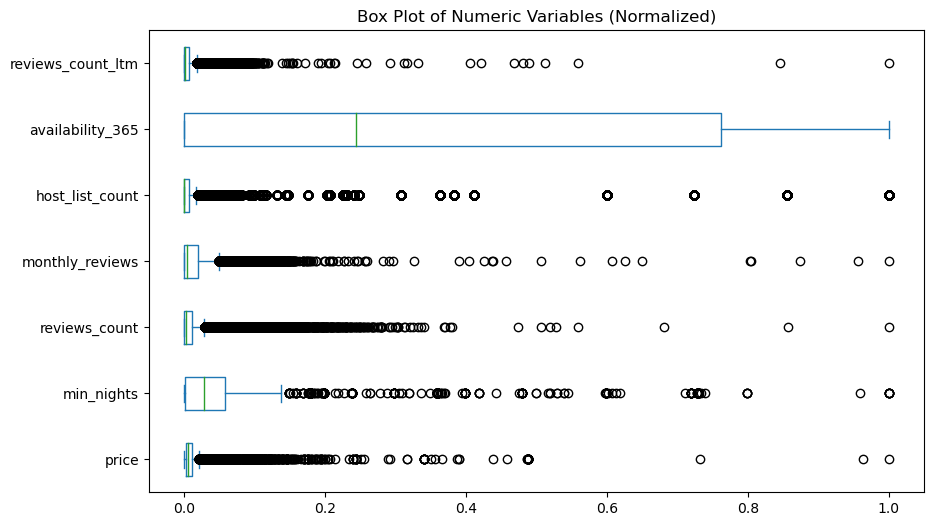

In [15]:
# review box plots for normalized variables
normalized_sub_df.plot(kind='box', vert=False, figsize=(10, 6))
plt.title('Box Plot of Numeric Variables (Normalized)')
plt.show()

# THE ELBOW TECHNIQUE

In [16]:
# define the range of potential clusters in the data
num_cl = range(1, 10)

# define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl]

In [17]:
# generate a score that represents the rate of variation for each cluster option
score = [kmeans[i].fit(normalized_sub_df).score(normalized_sub_df) for i in range(len(kmeans))]

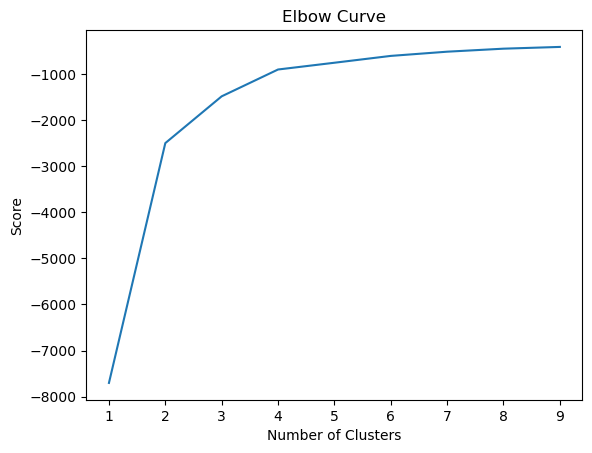

In [18]:
# generate plot to visualize the elbow curve using Pylab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

To determine the most suitable number of clusters for data clustering using the k-means algorithm, we employ the concept of **within-cluster sum of squares (WCSS)**. This involves calculating the WCSS value for different cluster counts and visualizing them on a line graph. The point at which the graph forms an 'elbow' marks the optimal cluster count, where a noticeable flattening of the line occurs. In the context of this dataset, this elbow point occurs at x=4. Beyond this point, the line consistently levels out for the subsequent cluster options.

Initially, I faced uncertainty between opting for 3 or 4 clusters. Yet, after conducting the algorithm and generating visualizations of pertinent variables to interpret the outcomes, the conclusion was reached that a 3-cluster configuration best aligns with the data's underlying patterns.

# K-MEANS CLUSTERING

In [19]:
# generate k-means object (define algorithm)
kmeans = KMeans(n_clusters=3, n_init='auto')

In [20]:
# fit k-means object to normalized & denormalized DataFrames (run algorithm)
kmeans.fit(normalized_sub_df)
kmeans.fit(subset_df)

KMeans(n_clusters=3, n_init='auto')

In [21]:
# add new column to normalized & denormalized DataFrames with values corresponding to which cluster every observation belongs
normalized_sub_df['clusters'] = kmeans.fit_predict(normalized_sub_df)
subset_df['clusters'] = kmeans.fit_predict(subset_df)

In [22]:
# first 5 rows (normalized)
normalized_sub_df.head()

,price,min_nights,reviews_count,monthly_reviews,host_list_count,availability_365,reviews_count_ltm,clusters
0,0.002440,0.058116,0.024704,0.004535,0.001761,0.000000,0.000000,1
1,0.011225,0.058116,0.024209,0.004691,0.003521,0.890411,0.000887,0
2,0.005368,0.008016,0.010870,0.002189,0.000000,0.734247,0.002660,0
3,0.012982,0.040080,0.001482,0.000469,0.000000,0.753425,0.000887,0
4,0.015373,0.012024,0.034091,0.007349,0.000000,0.104110,0.020390,1


In [23]:
# first 5 rows (denormalized)
subset_df.head()

,price,min_nights,reviews_count,monthly_reviews,host_list_count,availability_365,reviews_count_ltm,clusters
0,60,30,50,0.29,2,0,0,0
1,240,30,49,0.30,3,325,1,0
2,120,5,22,0.14,1,268,3,0
3,276,21,3,0.03,1,275,1,0
4,325,7,69,0.47,1,38,23,0


In [24]:
# frequency counts of 'clusters'
normalized_sub_df['clusters'].value_counts()

1    25169
0    16576
2     1810
Name: clusters, dtype: int64

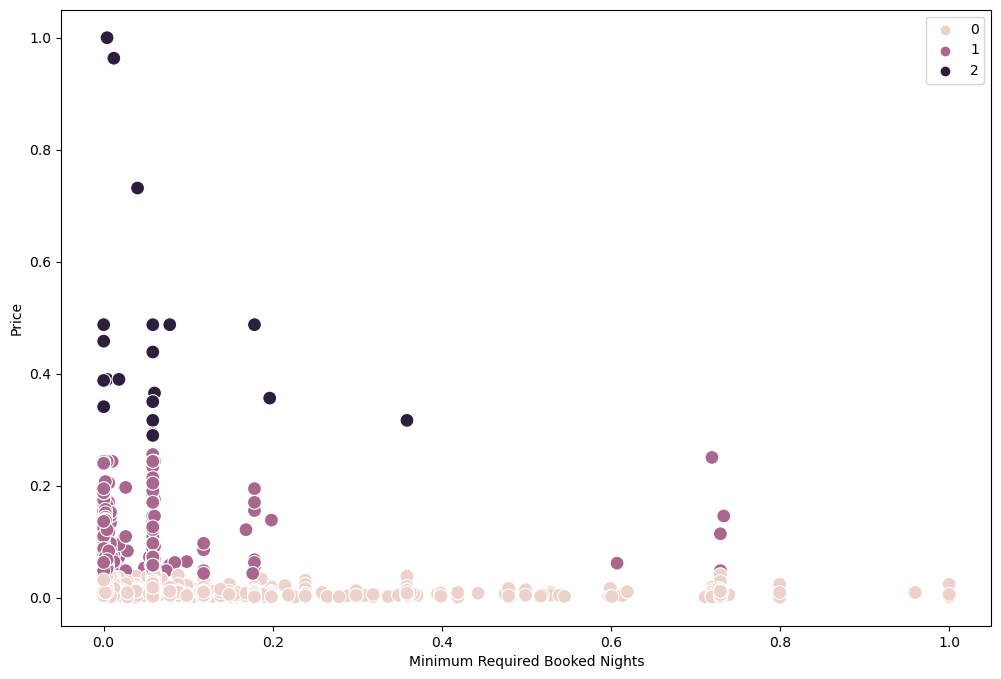

In [25]:
# generate plot to visualize clusters for 'min_nights' & 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=normalized_sub_df['min_nights'], y=normalized_sub_df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Minimum Required Booked Nights')
plt.ylabel('Price') 
plt.show()

### OBSERVATION(S)

**CLUSTER 0**

The pink beige cluster stands out at the lower end of the graph. These listings exhibit a 'price' value below 0.1 and are distributed broadly across the 'min_nights' scale, mostly falling below the 0.2 mark. This indicates that a significant portion of budget-friendly listings demands a short minimum stay duration. Interestingly, within this cluster, there's a notable subset of properties requiring an extended minimum stay, which could represent longer-term budget options.

**CLUSTER 1**

The purple cluster (Cluster 1) emerges prominently above the other clusters, encompassing a relatively smaller portion of the dataset. It characterizes properties with the highest prices and the least stringent minimum stay requirements. Notably, a few exceptional price points are present within this cluster, possibly indicating luxury offerings designed for shorter stays. This could imply that these premium properties attract guests seeking exclusive, high-end experiences over shorter periods.

**CLUSTER 2**

Positioned between the other two clusters, the dark purple cluster (Cluster 2) primarily resides below the 0.2 mark on both variables' relative scales. A few extreme values along the y-axis are present. This cluster signifies moderately-priced listings that generally have relatively lower minimum stay requirements. Given that this cluster holds the highest concentration of data points, it's reasonable to deduce that this and Cluster 0 encompass the most sought-after properties across the entire listing spectrum. This suggests that these moderately-priced listings with flexible stay durations are quite appealing to a significant portion of potential guests.

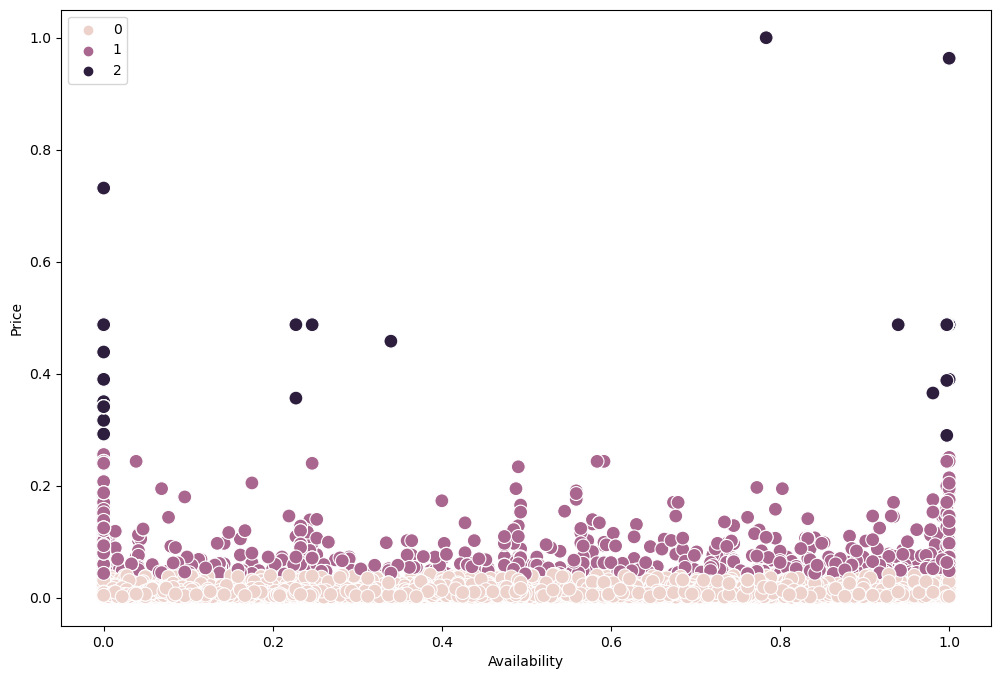

In [26]:
# generate plot to visualize clusters for 'availability_365' & 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=normalized_sub_df['availability_365'], y=normalized_sub_df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Availability')
plt.ylabel('Price') 
plt.show()

### OBSERVATION(S)

**CLUSTER 0**

The pink beige cluster showcases a balanced distribution along the availability scale, positioned below the 0.1 mark on the price scale. Remarkably, this cluster accommodates the majority of data points depicted on the graph. This dynamic distribution pattern points towards cost-effective properties that exhibit a wide availability spectrum, spanning from 0 to 365 days. This prevalence of budget-friendly listings with diverse stay options suggests a strong resonance with guests, indicating a high level of popularity among this category of offerings.

**CLUSTER 1**

The purple cluster, although sparsely populated, spotlights the highest-priced listings within the dataset. These listings exhibit two discernible patterns at the extremities of the availability scale. This pattern hints at a strategic market segmentation: opulent properties either embrace year-round availability (365 days) or purposefully maintain exclusivity with zero availability (0 days). This duality underscores a niche market for extended stays targeted at affluent guests who value both luxury and extended leisure.

**CLUSTER 2**

The dark purple cluster occupies an intermediary position between the other clusters, ranking second in terms of data point representation. Its distribution resembles a multimodal curve, featuring peaks at the low, middle, and high segments of the availability scale. This pattern suggests a tailored approach to catering to diverse guest preferences. These listings are curated to attract guests seeking premium options for short, moderate, or extended stays. This cluster's adaptable nature indicates a strategic alignment with varying guest requirements and travel durations.

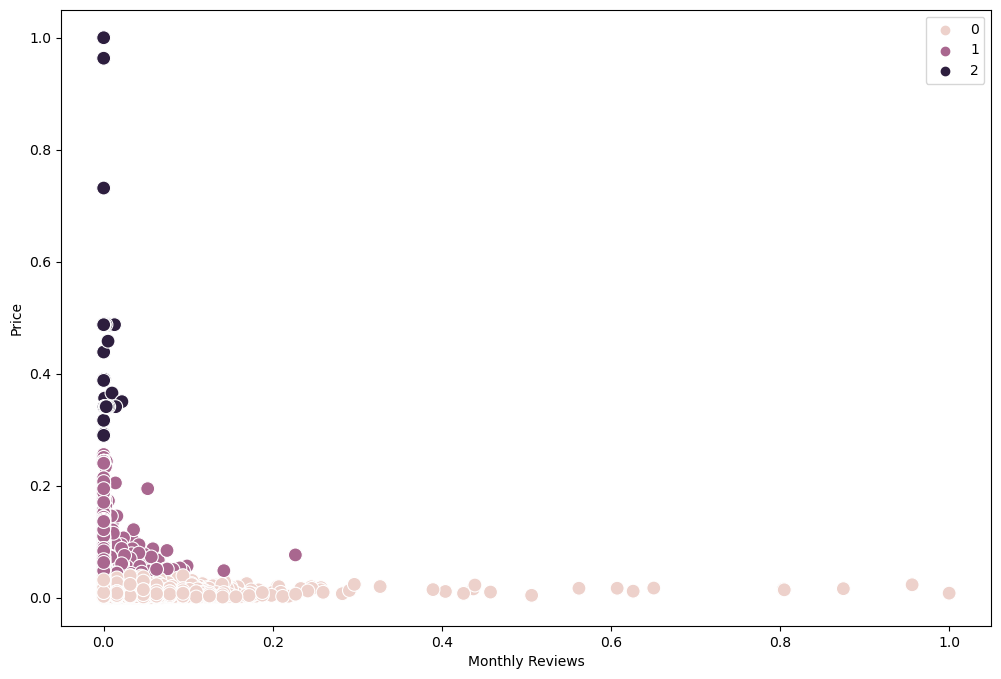

In [27]:
# generate plot to visualize clusters for 'monthly_reviews' & 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=normalized_sub_df['monthly_reviews'], y=normalized_sub_df['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Monthly Reviews')
plt.ylabel('Price') 
plt.show()

### OBSERVATIONS(S)

**CLUSTER 0**

The pink beige cluster follows a pattern akin to the previous trends. Situated at the graph's lowermost segment, data points span the entire range of monthly reviews. Notably, they predominantly congregate within the bottom-left corner, below the 0.2 mark on the monthly reviews scale, while remaining under the 0.1 mark on the price scale. This cluster uniquely exhibits several extreme values with a substantial volume of monthly reviews, serving as strong evidence of the resonance that low-priced listings enjoy among Airbnb guests.

**CLUSTER 1**

The purple cluster accounts for the smallest data subset in the graph. This grouping represents the highest-priced listings within the dataset. Remarkably, these properties maintain an approximate monthly review value of zero or close to it. This pattern implies that luxury offerings, despite their premium pricing, tend to garner minimal attention from guests in terms of reviews. The scarcity of reviews for these high-end offerings underscores the distinct market positioning and select guest segment they target.

**CLUSTER 2**

The dark purple cluster finds its place once again between the other clusters. This cluster represents moderately-priced listings and demonstrates a comparatively lower quantity of monthly reviews. This pattern reaffirms the inverse relationship between price and popularity within this specific segment: s prices become more accessible, a larger number of guests engage by submitting reviews. This observation aligns with prior findings about the appeal of economical listings to Airbnb guests.

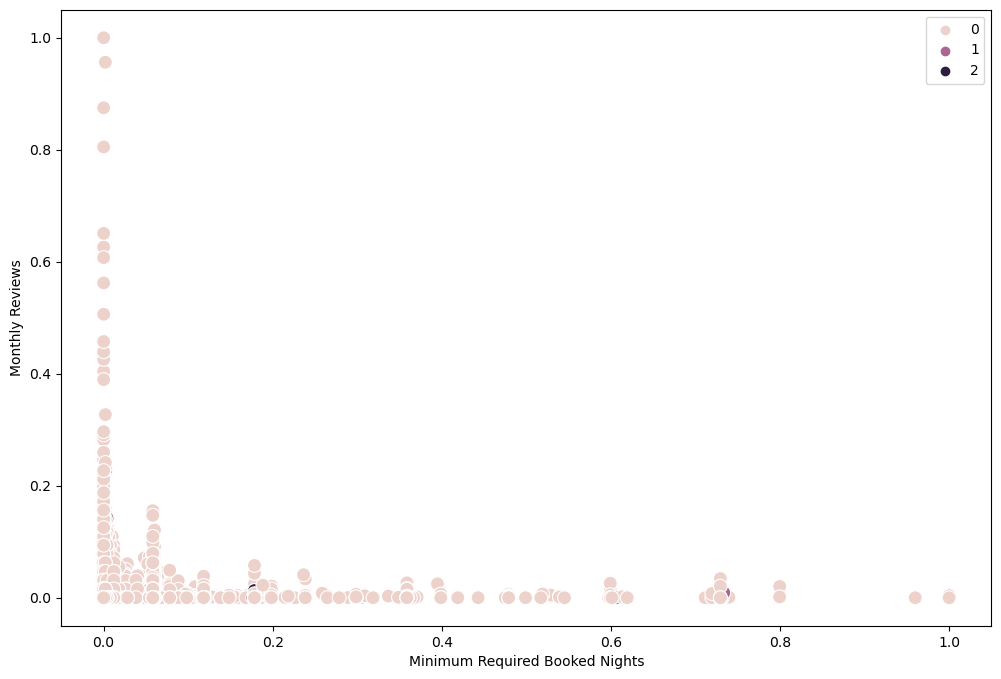

In [28]:
# generate plot to visualize clusters for 'min_nights' & 'monthly_reviews'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=normalized_sub_df['min_nights'], y=normalized_sub_df['monthly_reviews'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Minimum Required Booked Nights')
plt.ylabel('Monthly Reviews') 
plt.show()

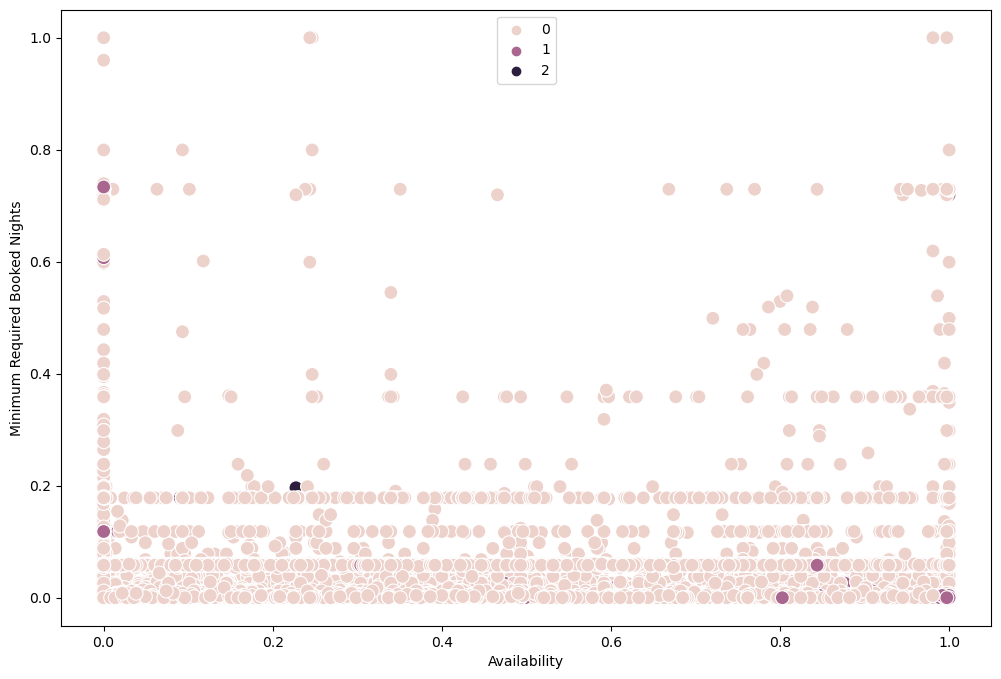

In [29]:
# generate plot to visualize clusters for 'availability_365' & 'min_nights'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=normalized_sub_df['availability_365'], y=normalized_sub_df['min_nights'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Availability')
plt.ylabel('Minimum Required Booked Nights') 
plt.show()

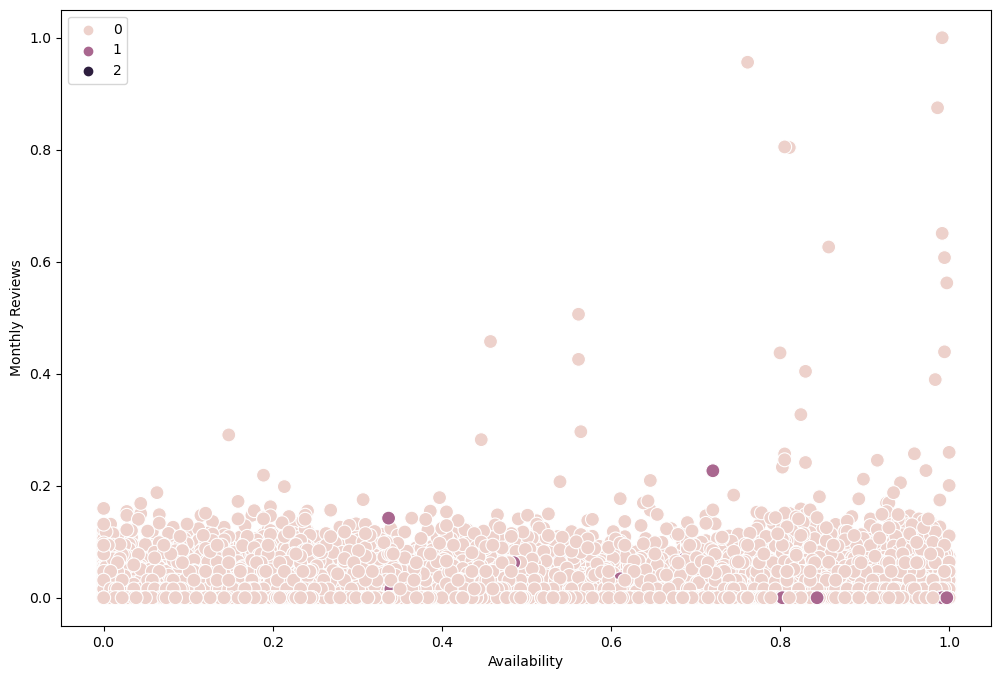

In [30]:
# generate plot to visualize clusters for 'availability_365' & 'monthly_reviews'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=normalized_sub_df['availability_365'], y=normalized_sub_df['monthly_reviews'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Availability')
plt.ylabel('Monthly Reviews') 
plt.show()

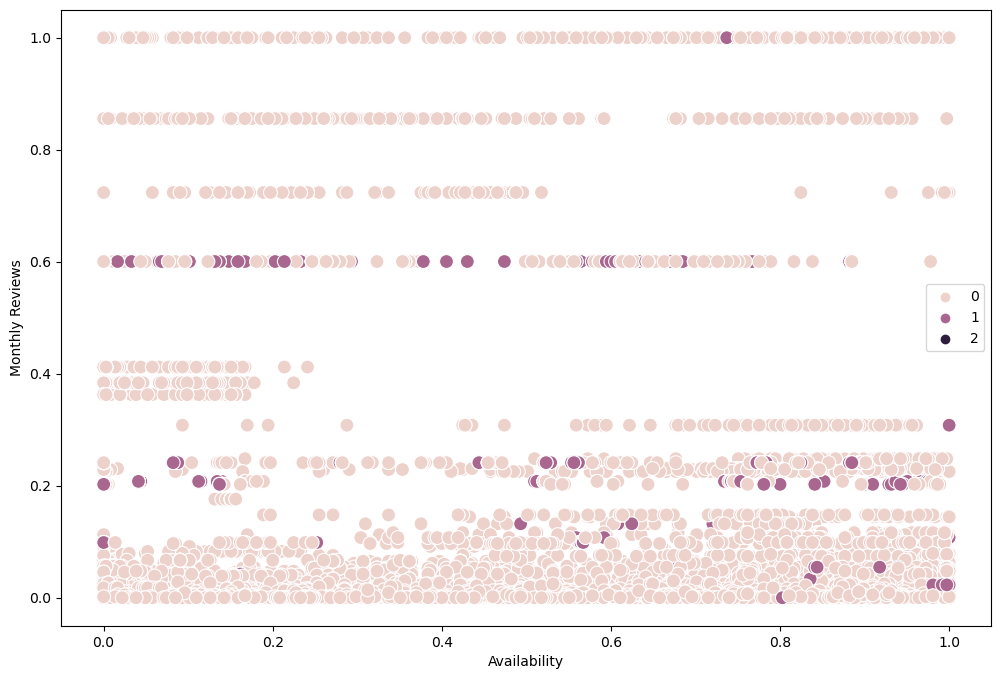

In [31]:
# generate plot to visualize clusters for 'availability_365' & 'host_list_count'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=normalized_sub_df['availability_365'], y=normalized_sub_df['host_list_count'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Availability')
plt.ylabel('Monthly Reviews') 
plt.show()

### OBSERVATION(S)

The presented scatterplots exploring different sets of relevant variables predominantly exhibit data points congregated within a single cluster (cluster 0). This collective concentration implies that the algorithm did not discern any meaningful patterns or distinct groups between the two variables under consideration. Consequently, the analysis reveals a scarcity of relevant findings within this particular dataset concerning the interplay of these variables.

# CLUSTER DESCRIPTIVE ANALYSIS

In [32]:
# create a flag for each value of 'clusters' in denormalized DataFrame
subset_df.loc[subset_df['clusters'] == 2, 'cluster'] = 'dark purple'
subset_df.loc[subset_df['clusters'] == 1, 'cluster'] = 'purple'
subset_df.loc[subset_df['clusters'] == 0, 'cluster'] = 'pink beige'

In [33]:
# calculate summary stats for relevant variables grouped by 'cluster'
subset_df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'min_nights':['mean', 'median'], 
                         'availability_365':['mean', 'median'],
                         'monthly_reviews':['mean', 'median'],
                         'host_list_count' : ['mean', 'median']})

price          min_nights        availability_365         \
                    mean   median       mean median             mean median   
cluster                                                                       
dark purple  9464.272727  10000.0  18.054545    1.0       203.727273  358.0   
pink beige    174.017754    132.0  18.768660   21.0       135.890487   88.0   
purple       1574.316505   1272.5  10.806796    2.0       179.287379  187.0   

            monthly_reviews        host_list_count         
                       mean median            mean median  
cluster                                                    
dark purple        0.130182   0.00        6.836364    3.0  
pink beige         0.940191   0.24       29.876195    1.0  
purple             0.387175   0.00       76.173786    5.0

### OBSERVATION(S)

Considering the prevalence of noteworthy outlier values across all numeric variables within this dataset, the computed means emerge as less informative due to their susceptibility to extreme values. However, the focus on median values yields insightful validations in congruence with the cluster analysis:

* The purple cluster demonstrates the highest median price, alongside the lowest median minimum required nights and monthly review counts. This aligns with the characteristics of luxury properties offering shorter stays that cater to a niche market. Additionally, this cluster boasts the highest median availability, indicative of a diverse range of options for potential guests seeking exclusivity without extensive stay commitments.

* The pink beige cluster is distinguished by its lowest median price, coupled with the highest median minimum required nights and monthly review counts among all clusters. This corroborates the notion of this cluster comprising economical listings aimed at guests desiring longer stays. The heightened median review counts suggest positive guest experiences and enduring popularity among budget-conscious travelers.

* The dark purple cluster, as previously discussed, maintains an intermediate position amidst the other clusters across median values for each variable. Notably, its standout attribute is the median number of listings per host. This likely indicates a pronounced market demand for listings exhibiting these distinct characteristics—beneficial not only for customers but also for hosts. The balanced distribution of properties in this cluster underscores its strategic significance within the market.

### NEXT STEPS AND POTENTIAL APPLICATIONS

Using the refined guest clusters, Airbnb can tailor marketing efforts and services for better guest segmentation, while new data features derived from cluster characteristics can enhance predictive models and personalized recommendations. By integrating cluster information into these models, more accurate predictions of booking likelihood, guest satisfaction, and revenue can be achieved. Additionally, analyzing regional and seasonal trends within clusters can fine-tune pricing strategies, promotions, and inventory management. Detection systems for data anomalies and irregular pricing strategies can be implemented to improve data quality and decision-making. Furthermore, insights from guest reviews within clusters can guide property improvements and communication strategies, leading to enhanced guest experiences. Sharing guest preference insights with hosts can help them optimize property descriptions and offerings. Designing tests to experiment with changes based on cluster traits can measure the impact on bookings and satisfaction, contributing to effective decision-making. Integrating clusters into pricing algorithms can result in competitive rates that match guest preferences, ultimately boosting bookings.
